In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
    
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.2, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
def pca_value(X_train,X_test,n):
        pca = PCA(n_components = n)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        explained_variance = pca.explained_variance_ratio_
        singular_value = pca.singular_values_
        return X_train,X_test,explained_variance,singular_value

def cm_prediction(classifier,X_test,y_test):
     y_pred = classifier.predict(X_test)
     print(classifier)
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

def logistic(X_train,y_train,X_test,y_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm 
    
def svm_linear(X_train,y_train,X_test,y_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def svm_NL(X_train,y_train,X_test,y_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
   
def Navie(X_train,y_train,X_test,y_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
    
def knn(X_train,y_train,X_test,y_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
def Decision(X_train,y_train,X_test,y_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


def random(X_train,y_train,X_test,y_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test,y_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def visual_train(X_train,y_train):     
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                        c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
        plt.title('Logistic Regression (Training set)')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend()
        plt.show() 
    
def visual_train(X_test,y_test):     
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
        plt.title('Logistic Regression (Test set)')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend()
        plt.show()
    
def pca_classification(pca_value_best,acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=[f"PCA {pca_value_best}"],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [3]:
dataset = pd.read_csv('Wine.csv')
indep_X = dataset.iloc[:, 0:13].values
dep_Y = dataset.iloc[:, 13].values

In [4]:
X_train, X_test, y_train, y_test=split_scalar(indep_X,dep_Y)  

In [5]:
X_train,X_test,pca_best_value,singular_value=pca_value(X_train,X_test,2)    
print("For Principal Values",pca_best_value)

For Principal Values [0.36884109 0.19318394]


In [6]:
acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]


classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test,y_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test,y_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test,y_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test,y_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test,y_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test,y_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test,y_test)  
accrf.append(Accuracy)


LogisticRegression(random_state=0)
SVC(kernel='linear', random_state=0)
SVC(random_state=0)
KNeighborsClassifier()
GaussianNB()
DecisionTreeClassifier(criterion='entropy', random_state=0)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


In [7]:
print("For Principal Values",pca_best_value)
print(acclog)
print(accsvml)
print(accsvmnl)
print(accknn)
print(accnav)
print(accdes)
print(accrf)

result=pca_classification(pca_best_value,acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

For Principal Values [0.36884109 0.19318394]
[0.9722222222222222]
[0.9722222222222222]
[0.9722222222222222]
[0.9722222222222222]
[0.9722222222222222]
[0.9722222222222222]
[0.9722222222222222]


In [8]:
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
PCA [0.36884109 0.19318394],0.972222,0.972222,0.972222,0.972222,0.972222,0.972222,0.972222


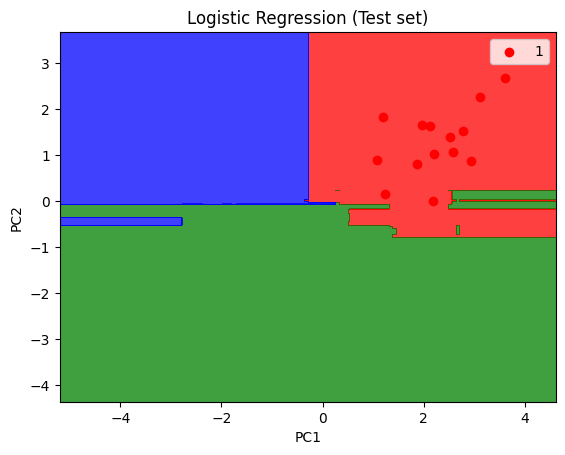

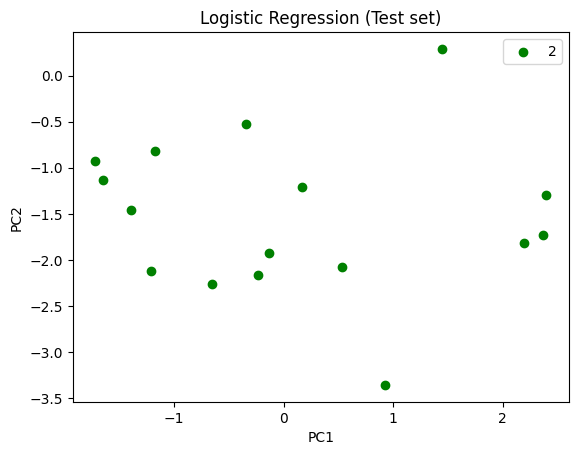

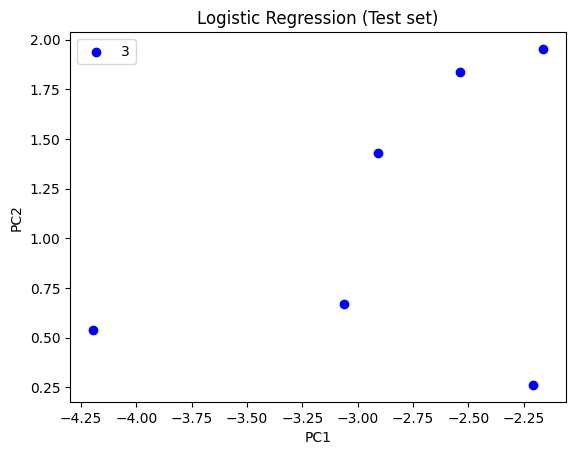

In [9]:
visual_train(X_test,y_test)

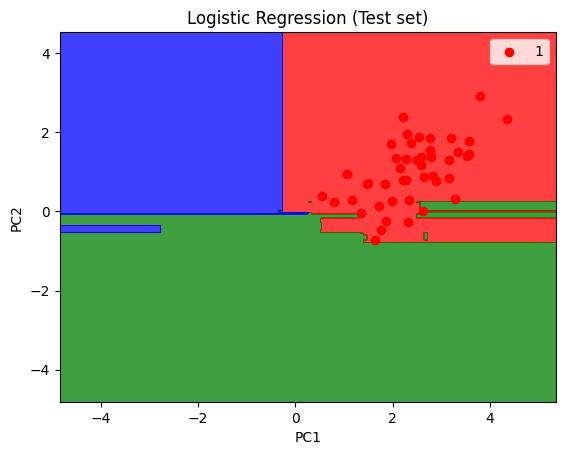

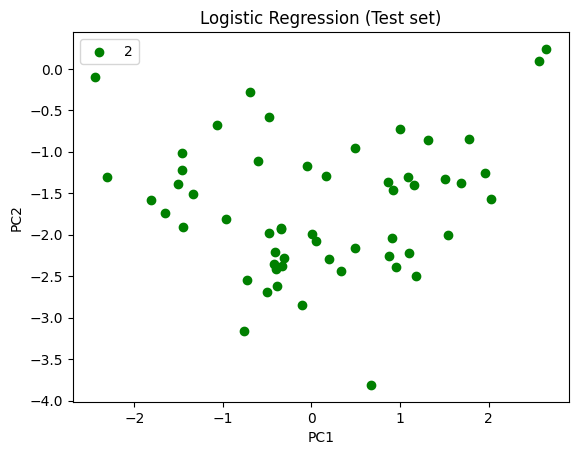

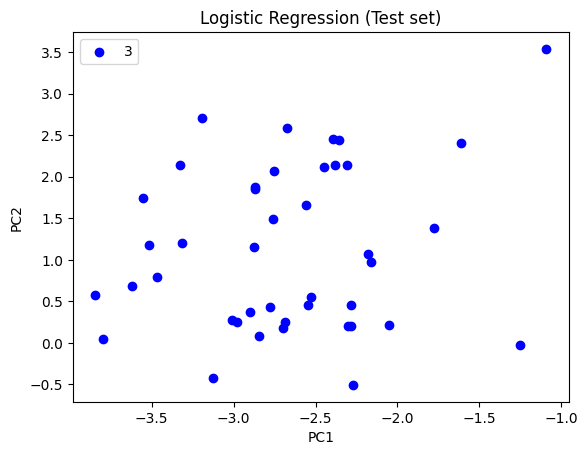

In [10]:
visual_train(X_train,y_train)